# Predicting Medical Costs Using Linear Regression 

We have a dataset of various patient demographic information and their associated medical charges. We are going to use this dataset to determine which patients are likely to have a higher cost. This can help inform hospitals and various healthcare organizations about how to better manage staff and forecast revenue. 

In [1]:
#Importing relevant packages 

import pandas as pd 
import numpy as np 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Read package into df 
insurance = pd.read_csv('insurance.csv')

#Quick exploratory analysis of dataset 
print(insurance.head(), '\n')
print(f'Number of features: {insurance.shape[1]}','\n')
print(f'Number of observations: {insurance.shape[0]}','\n')
print(insurance.dtypes, '\n')
print(insurance.isna().sum())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520 

Number of features: 7 

Number of observations: 1338 

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object 

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In this dataset, we have 7 total features: 6 features that we can choose from for our predictor and our outcome variable, charges. Three of the predictor variables are categorical while the other three are continuous. We also do not have any missing values.

## Data Visualization 

We are going to create a simple histogram for our data to understand the shape and potential skew of our data. 

#### Histogram

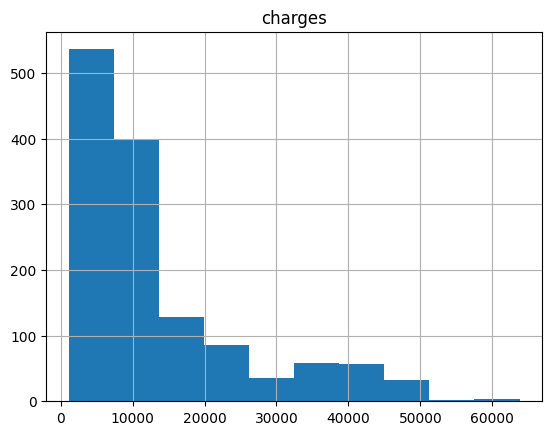

In [3]:
insurance.hist('charges')
plt.show()

We see that our data is skewed right with most charges distributed from 0-10000 and fewer values at high charge values. Because we have a skewed model, we are going to tranform our outcome variable charges, using a log function. This log function will reduce the impact of extreme values by compressing the range of the data. We want to avoid having extreme values in our dataset because extreme values can cause heteroscedasticity, where the variance of the errors is not constant across levels of the independent variable. A log transformation can stabilize the variance, making the data more suitable for linear modeling techniques that assume homoscedasticity (constant variance). 

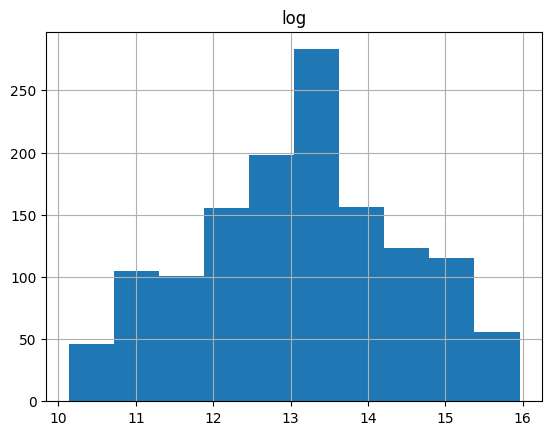

In [4]:
insurance['log'] = np.log2(insurance['charges'])
insurance.hist('log')
plt.show()

Now we see that our data has a normal distribution which is what we want to observe before applying a linear model. 

#### Heatmap 

Before we apply our linear model, we want to choose our predictor(s). We are going to create dummy variables for our categorical variables and drop the first column to prevent potential multicollinearity.

In [ ]:
insurance_dummy = pd.get_dummies(insurance, columns = ['sex', 'smoker', 'region'], drop_first = True)


#Observing any strong correlations
fig, axes = plt.subplots(figsize=(16,10))
insurance_corr = insurance_dummy.corr()
sns.heatmap(insurance_corr, cmap="coolwarm", annot = True)
plt.title("Insurance Correlation", fontsize=10)
plt.tight_layout()
plt.show()

Because we did a log transformation on our charges variable, we are seeking variables that have a positive correlation with our log transformed variable. This is because the log charges will be the variable that is used in our model and we want to ensure consistency when evaluating possible relationships. 

The variables that have the highest positive correlation with the log transformation of charges is age, smoking, and potential children. Now that we have our predictors, we are ready to set up our model. 

## Linear Model 

In [ ]:
#Setting up features and target 
X = insurance_dummy[['age', 'smoker_yes', 'children']]
y = insurance_dummy['log'] 

#Splitting our dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [ ]:
#Instantiating a linear regression model 
model = LinearRegression()

#Fitting our model to the training data 
model.fit(X_train, y_train) 

#Predicting target values based off of model 
prediction = model.predict(X_train)

In [ ]:
#Evaluating MSE and RMSE of training model 

print('Intercept =', model.intercept_)

#MSE and RMSE on Log Scale 
print('Root Mean squared error on log scale =', mean_squared_error(y_train, prediction, squared=False))
print('Mean squared error on log scale =', mean_squared_error(y_train, prediction))

#MSE and RMSE on Original Scale 
print('Root Mean squared error on original scale =', np.exp(mean_squared_error(y_train, prediction, squared=False)))
print('Mean squared error on original scale =', np.exp(mean_squared_error(y_train, prediction)))

print('R squared =', r2_score(y_train, prediction))

75% of the variability of hospital charges is explained by age, smoking, and having children in the regression model.

We are now going to plot our predicted values that we found based off the training model and see if there is a trend. We expect to see an even distribution that is centered around zero. 


In [ ]:
residual = y_train - prediction 
plt.figure(figsize=(10,10))
plt.scatter(prediction, residual)
plt.xlabel("Prediction")
plt.ylabel("Residual")
plt.title("Residual Plot")
plt.show()

From the shape of this plot, we see a negative correlation where as values get larger, the residuals get smaller. 

In [ ]:
print('Coefficient on log scale =', model.coef_)
print('Coefficient on original scale =', np.exp(model.coef_))

From our model we see the coefficient for age, smoking and children are 0.05, 2.22 and 0.13 respectively. This means that on the original scale: 
- For a 1 unit increase in age, we expect an increase of hospital charges by 5.1%, holding smoking and having children constant. 
- For a 1 unit increase in smoking, we expect an increase of hospital charges by 828%, holding age and having children constant. 
- For a 1 unit increase in having children, we expect an increase of hospital charges by 14.2%, holding age and smoking constant. 

## Test Model 

In [ ]:
#Using test model now 

test_prediction = model.predict(X_test)

#Test MSE on log scale 
print('Mean squared error on log scale =', mean_squared_error(y_test, test_prediction))
print('Mean squared error on original scale =', np.exp(mean_squared_error(y_test, test_prediction)))

We see that the MSE of our training model using the original scale, 1.55, is similar to the MSE of test model using the original scale, 1.47. Therefore, the model did not overfit. 

## Final Thoughts

From our model, we saw that 75% of the variation of hospital charges was explained by the age, smoking, and having children. Additionally, we saw that we did not overfit our model. 

However, based on the shape of the residuals, we know that our model is underestimating values and is not accurately predicting what the hospital charges could be. 

Therefore, for future improvements we can choose a different combination of predictors, or make our predictors more complex in order to create a better model. 

By creating a better model that can predict hospital charges, we can better plan staff utilization and project potential profits and/or losses for various medicial facilities. 